# K-Means Practice

## Import Necessary Libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Data Preparation

In [2]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_data_frame = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_data_frame.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_data_frame = iris_data_frame.drop(columns=['Sepal Length', 'Sepal Width'])
iris_data_frame

,Petal Length,Petal Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Data Scaling

In [12]:
scaler = MinMaxScaler()

In [18]:
petal_length_scaled = scaler.fit_transform(iris_data_frame[['Petal Length']])
petal_width_scaled = scaler.fit_transform(iris_data_frame[['Petal Width']])

In [19]:
iris_data_frame['Petal Length'] = petal_length_scaled
iris_data_frame['Petal Width'] = petal_width_scaled

In [21]:
iris_data_frame.head()

,Petal Length,Petal Width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


## Elbow Method
Finding the best number of cluster using the Elbow Method

In [24]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris_data_frame)
    sse.append(km.inertia_)

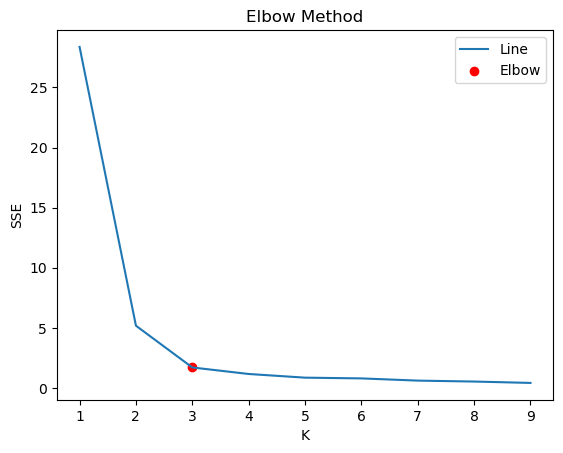

In [29]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse, label='Line')
plt.scatter(k_range[2], sse[2], color='red', label='Elbow')
plt.legend()
plt.show()

## Model Building